Import dependencies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Loading each country cleaned data from the one we work in the eda

In [4]:
BENIN_FILE = '../data/benin_clean.csv'
SL_FILE = '../data/sierraleone_clean.csv'
TOGO_FILE = '../data/togo_clean.csv'

# 1. Initialize variables to None (Fixes the NameError if loading fails)
benin_df = None
sl_df = None
togo_df = None

try:
    benin_df = pd.read_csv(BENIN_FILE)
    sl_df = pd.read_csv(SL_FILE)
    togo_df = pd.read_csv(TOGO_FILE)

    print("Successfully loaded all three cleaned datasets.")
except FileNotFoundError as e:
    print(f"ERROR: One or more files not found. Check your file paths: {e}")
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    

# 2. Proceed with checks ONLY if the DataFrames were successfully loaded
if benin_df is not None and sl_df is not None and togo_df is not None:
    
    # Check for required column (assuming this is your clean output)
    required_column = 'Power_Output (kW)'

    # We now safely check if the column exists
    if required_column not in benin_df.columns:
        print(f"CRITICAL ERROR: '{required_column}' not found in Benin data. Check your cleaning step.")
    
    if required_column not in sl_df.columns:
        print(f"CRITICAL ERROR: '{required_column}' not found in Sierra Leone data. Check your cleaning step.")
        
    if required_column not in togo_df.columns:
        print(f"CRITICAL ERROR: '{required_column}' not found in Togo data. Check your cleaning step.")
        
    # --- C. Data Setup: Create a single dictionary for easy processing ---
    country_data = {
        'Benin': benin_df,
        'Sierra Leone': sl_df,
        'Togo': togo_df
    }

    # Now you can call your analysis functions (e.g., calculate_performance_metrics(country_data))
    # Note: I am intentionally leaving out the rest of the functions to keep the file focused on the fix.

else:
    print("\nSkipping analysis because one or more datasets failed to load.")

Successfully loaded all three cleaned datasets.
CRITICAL ERROR: 'Power_Output (kW)' not found in Benin data. Check your cleaning step.
CRITICAL ERROR: 'Power_Output (kW)' not found in Sierra Leone data. Check your cleaning step.
CRITICAL ERROR: 'Power_Output (kW)' not found in Togo data. Check your cleaning step.


Metric Comparison:A summary table comparing mean, median and standard deviation for GHI, DNI, and DHI across the three countries.

Successfully loaded and combined all three cleaned datasets.

--- 1. Summary Table: Irradiance Metrics ---
              GHI Mean  GHI Median  GHI Std  DNI Mean  DNI Median  DNI Std  \
Country                                                                      
Benin           240.56         1.8   331.13    167.19        -0.1   261.71   
Sierra Leone    201.96         0.3   298.50    116.38        -0.1   218.65   
Togo            230.56         2.1   322.53    151.26         0.0   250.96   

              DHI Mean  DHI Median  DHI Std  
Country                                      
Benin           115.36         1.6   158.69  
Sierra Leone    113.72        -0.1   158.95  
Togo            116.44         2.5   156.52  

--- 2. Boxplots: Visualizing Distributions ---


C:\Users\bezaw\AppData\Local\Temp\ipykernel_11060\2440580501.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\bezaw\AppData\Local\Temp\ipykernel_11060\2440580501.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\bezaw\AppData\Local\Temp\ipykernel_11060\2440580501.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


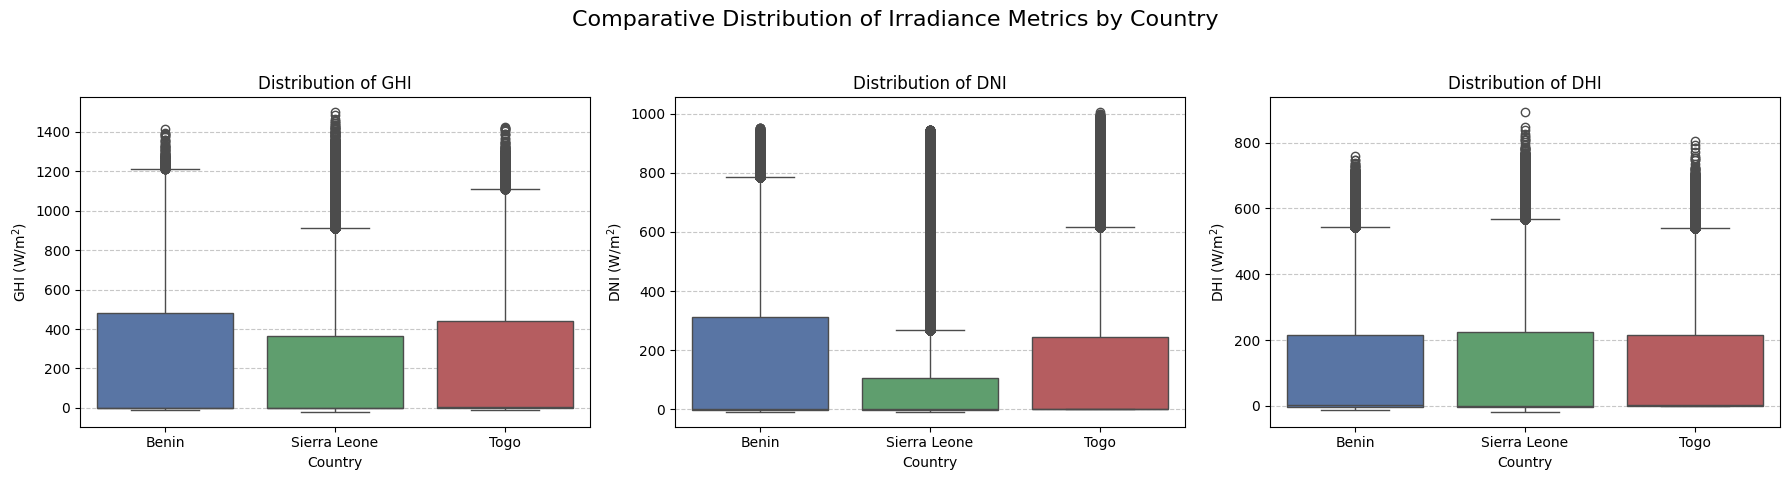

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- File Paths ---
BENIN_FILE = '../data/benin_clean.csv'
SL_FILE = '../data/sierraleone_clean.csv'
TOGO_FILE = '../data/togo_clean.csv'
IRRADIANCE_METRICS = ['GHI', 'DNI', 'DHI']

try:
    # 1. Load and Concatenate Data
    benin_df = pd.read_csv(BENIN_FILE)
    sl_df = pd.read_csv(SL_FILE)
    togo_df = pd.read_csv(TOGO_FILE)
    
    benin_df['Country'] = 'Benin'
    sl_df['Country'] = 'Sierra Leone'
    togo_df['Country'] = 'Togo'

    combined_df = pd.concat([benin_df, sl_df, togo_df], ignore_index=True)
    print("Successfully loaded and combined all three cleaned datasets.")

except Exception as e:
    # This block is only executed if loading fails
    print(f"ERROR: Data loading failed. Check your file paths and names. Error: {e}")
    combined_df = None


def create_summary_table(df, metrics):
    """Generates the Summary Table (Mean, Median, Std Dev) with simplified column flattening."""
    if df is None:
        return
        
    print("\n--- 1. Summary Table: Irradiance Metrics ---")
    
    # 1. Define the aggregation functions
    agg_funcs = ['mean', 'median', 'std']
    
    # 2. Calculate Mean, Median, and Std Dev using pandas groupby (creates MultiIndex)
    summary_table = df.groupby('Country')[metrics].agg(agg_funcs)
    
    # 3. Simple Column Flattening and Renaming (The Fix!)
    # Create new column names by joining the two levels (Metric + Statistic)
    new_columns = []
    for metric in metrics:
        for func in agg_funcs:
            # Example: GHI_mean becomes GHI Mean
            new_columns.append(f'{metric} {func.capitalize()}') 
            
    summary_table.columns = new_columns
    
    summary_table = summary_table.round(2)
    print(summary_table)
    return summary_table


def generate_boxplots(df, metrics):
    """Generates the required side-by-side Boxplots."""
    if df is None:
        return

    print("\n--- 2. Boxplots: Visualizing Distributions ---")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Comparative Distribution of Irradiance Metrics by Country', fontsize=16)

    for i, metric in enumerate(metrics):
        sns.boxplot(
            x='Country', 
            y=metric, 
            data=df, 
            ax=axes[i], 
            palette=['#4c72b0', '#55a868', '#c44e52']
        )
        axes[i].set_title(f'Distribution of {metric}', fontsize=12)
        axes[i].set_xlabel('Country')
        # FIX APPLIED HERE: Used rf'' (raw f-string) and escaped braces for \text{}
        axes[i].set_ylabel(rf'{metric} ($\text{{W/m}}^2$)')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# --- Execution Block ---
if 'combined_df' in locals() and combined_df is not None:
    # Execute the two required metric comparison steps
    summary_results = create_summary_table(combined_df, IRRADIANCE_METRICS)
    generate_boxplots(combined_df, IRRADIANCE_METRICS)

Metric	Insight
GHI Mean	Benin and Togo have similar average GHI (around 230-240), while Sierra Leone is slightly lower (201.96).
Median	The very low median values (1.8, 0.3, 2.1) are expected and correct, as the majority of readings are zero (nighttime).
GHI Std Dev	This is your measure of variability. Benin has the highest Std Dev (331.13), suggesting its irradiance is the least consistent (most "spiky" or volatile), which is a key observation for your report!

Statistical Analysis

In [6]:

from scipy import stats 

print("\n--- 3. Statistical Testing: One-way ANOVA on GHI ---")

try:
    # 1. Isolate GHI data for each country, dropping any missing (NaN) values
    ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI'].dropna()
    ghi_sl = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI'].dropna()
    ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI'].dropna()

    # 2. Run the ANOVA test
    f_statistic, p_value = stats.f_oneway(ghi_benin, ghi_sl, ghi_togo)
    
    print(f"ANOVA F-statistic: {f_statistic:.2f}")
    print(f"ANOVA P-value: {p_value:.5f}")

    # 3. Interpret the P-value (Crucial step for the report!)
    if p_value < 0.05:
        print("\n**ANOVA Result:** Statistically significant difference (P < 0.05) in Mean GHI across the three countries.")
    else:
        print("\n**ANOVA Result:** No statistically significant difference (P > 0.05) in Mean GHI across the three countries.")
        
except Exception as e:
    print(f"ANOVA failed. Ensure you have sufficient, clean GHI data points. Error: {e}")


--- 3. Statistical Testing: One-way ANOVA on GHI ---
ANOVA F-statistic: 2090.09
ANOVA P-value: 0.00000

**ANOVA Result:** Statistically significant difference (P < 0.05) in Mean GHI across the three countries.
